<a href="https://colab.research.google.com/github/lizzietsitsishvili/ECON3916-Statistical-Machine-Learning/blob/main/Lab%203%20/%20Lab_3_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['ARG', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [16]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_gtm = df.xs('ARG', axis=1, level=0).copy()

Fetching data...


In [17]:
df_gtm.head()

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate
Year,,,,,,,,,,,,
2000,NaN,9.622604,13.784191,10.986375,17.533487,11.636070,3.956461e+11,10631.650364,16.883797,62.324,16660492.0,15.000
2001,NaN,9.324899,14.156274,11.579008,15.625965,10.273247,3.782027e+11,10051.944846,16.931741,61.646,16712140.0,17.320
2002,NaN,9.818958,12.235247,28.382597,10.853905,13.370127,3.369994e+11,8861.561993,25.866329,60.112,16524914.0,19.590
2003,NaN,12.518780,11.438057,25.930943,14.146962,14.713805,3.667802e+11,9545.531941,25.364137,61.018,17006209.0,15.360
2004,NaN,13.100780,11.114636,23.847619,17.551270,16.845027,3.998989e+11,10302.446532,24.553863,61.943,17502349.0,13.522


In [18]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

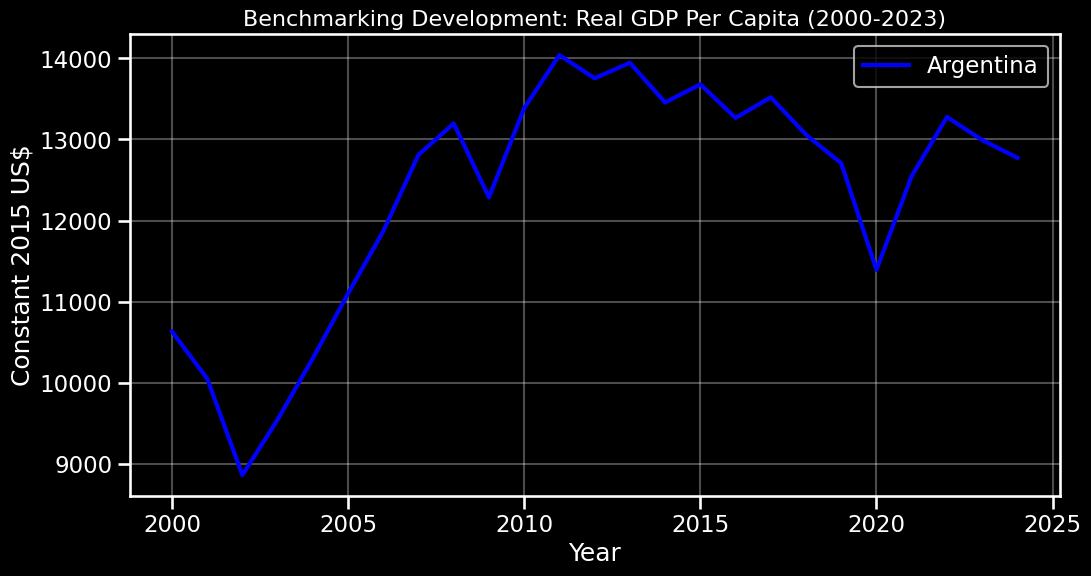

In [20]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('ARG', 'GDP_Per_Capita_Const')], label='Argentina', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

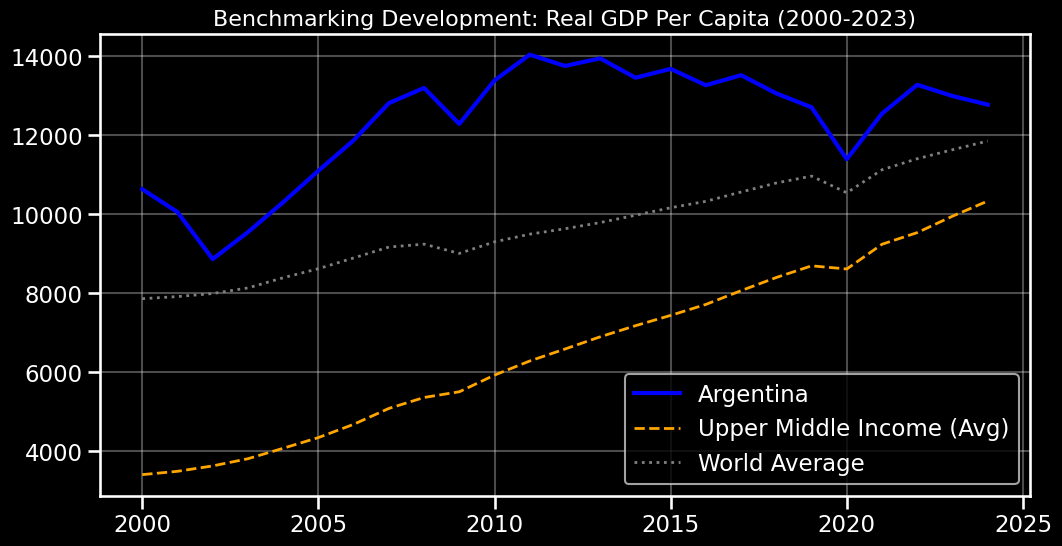

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('ARG', 'GDP_Per_Capita_Const')], label='Argentina', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

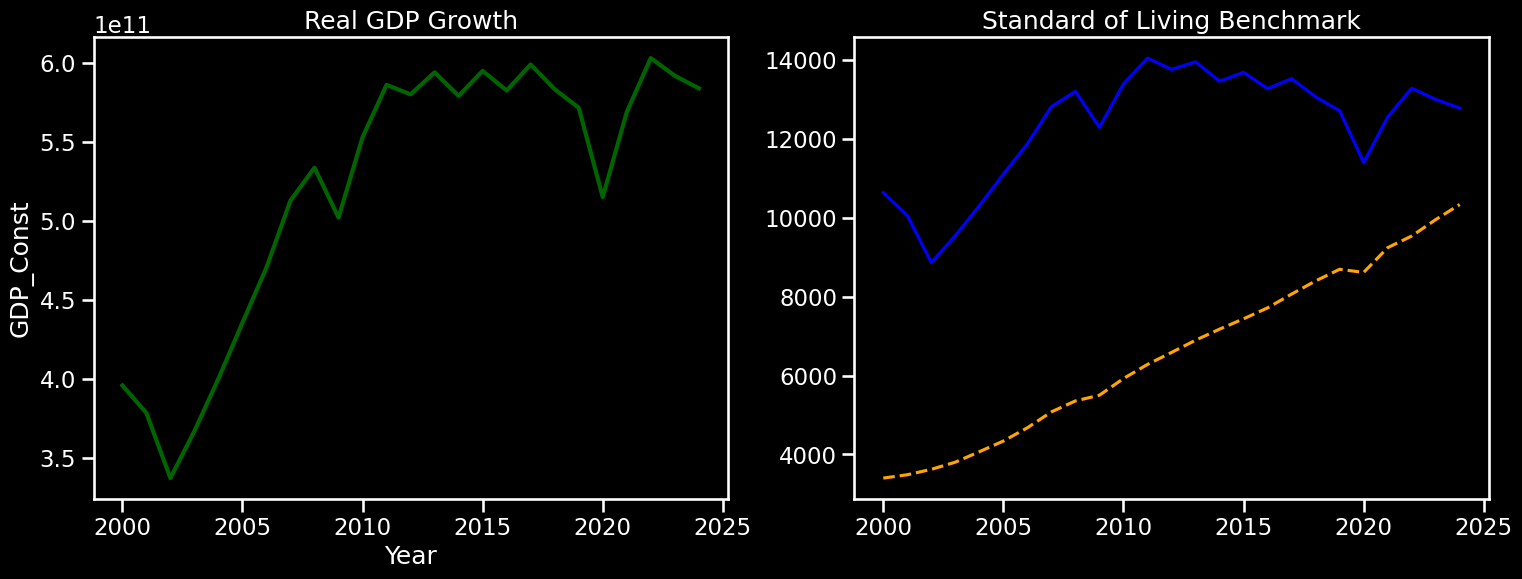

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('ARG', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

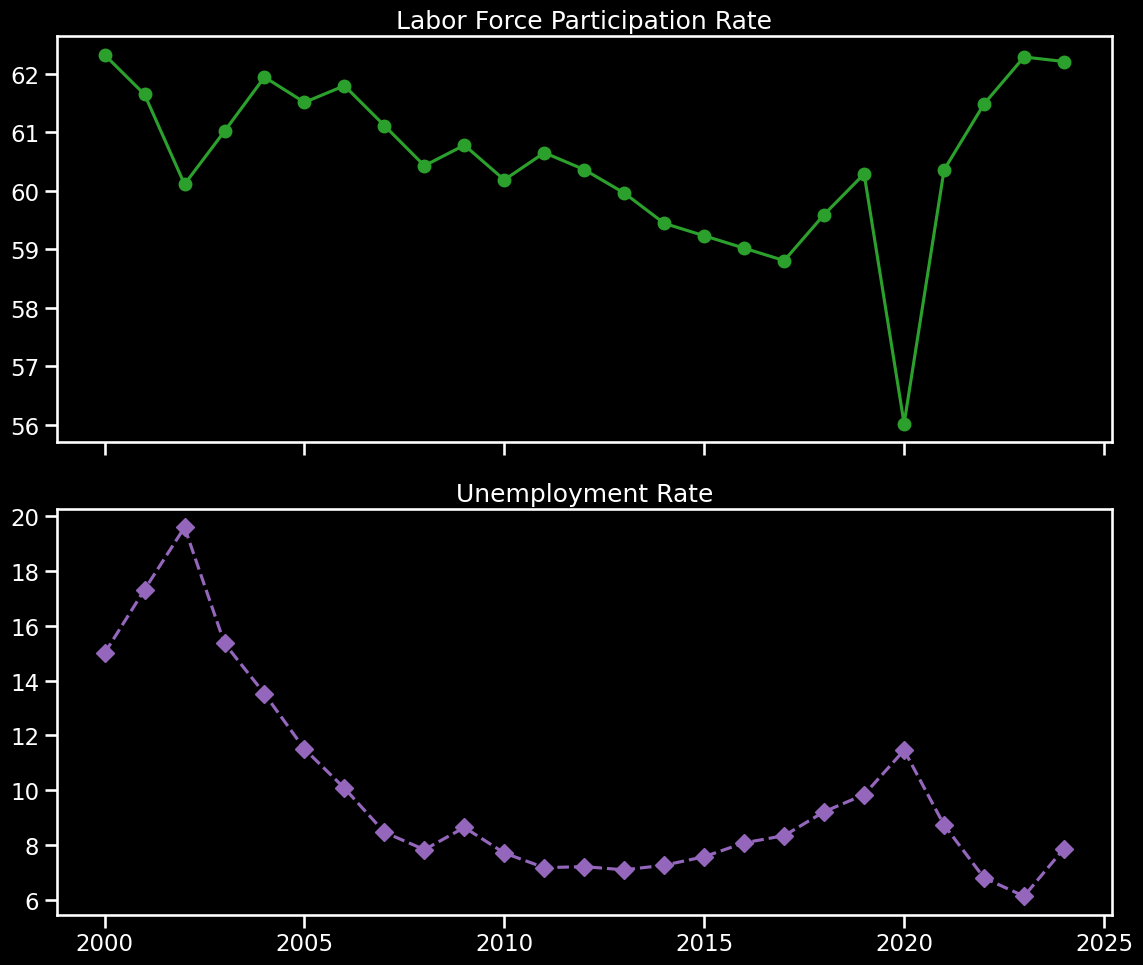

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

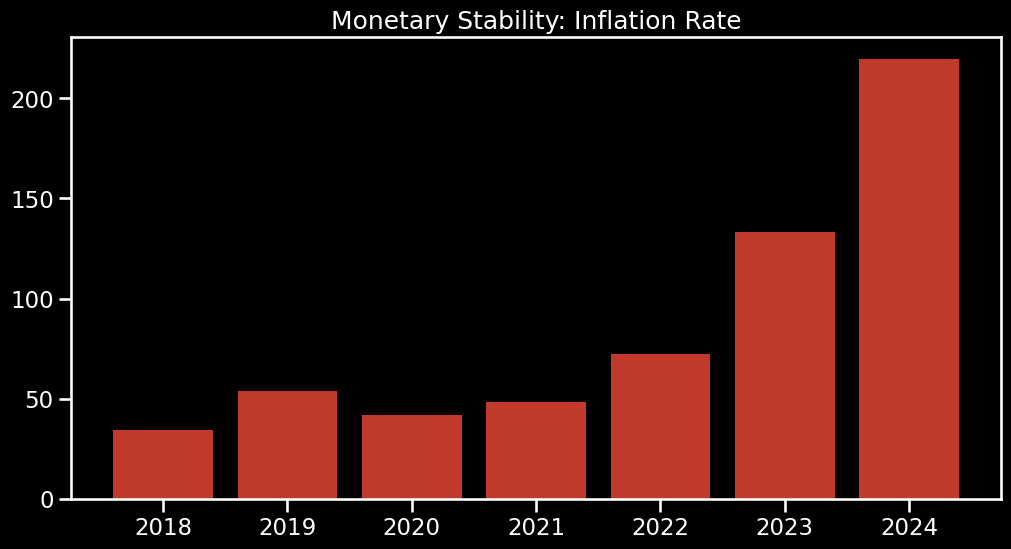

In [24]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()


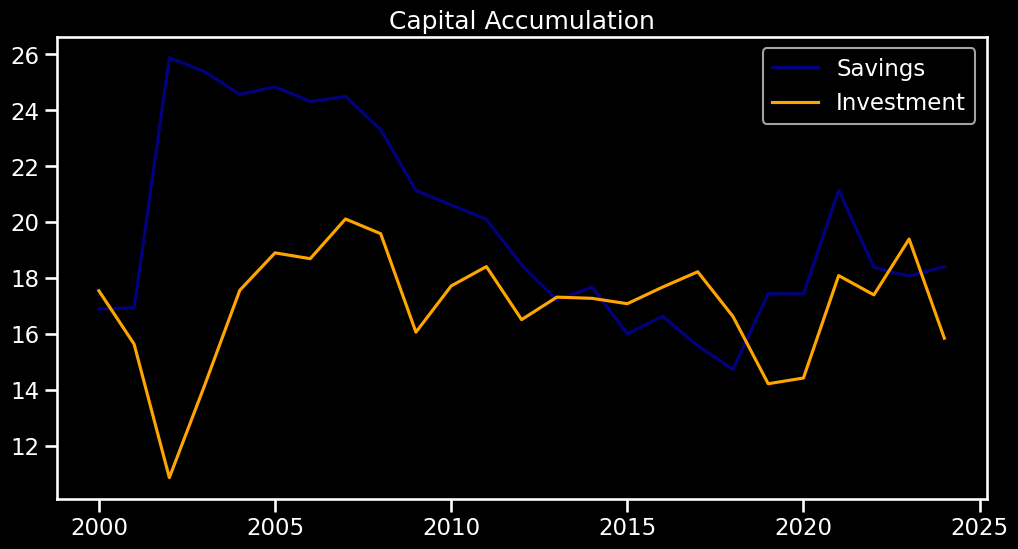

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

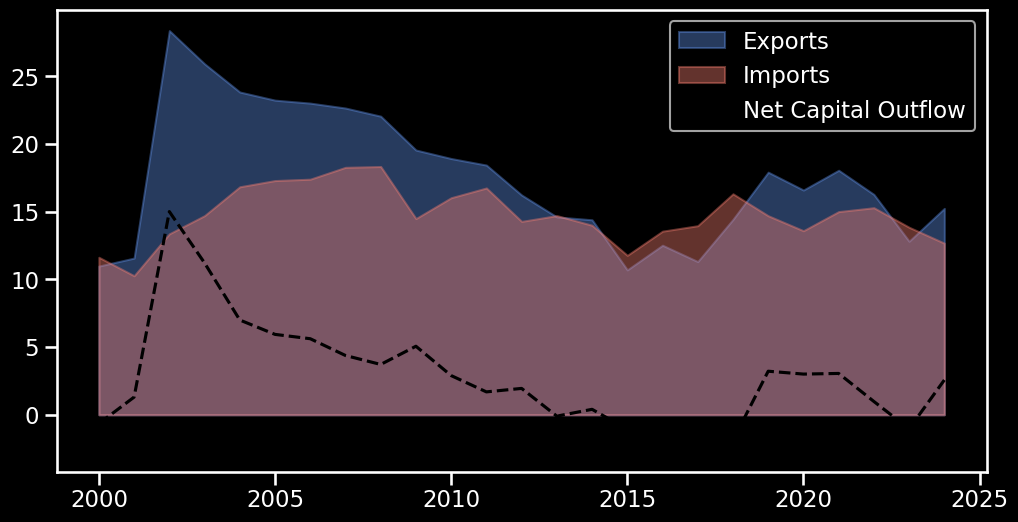

In [26]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

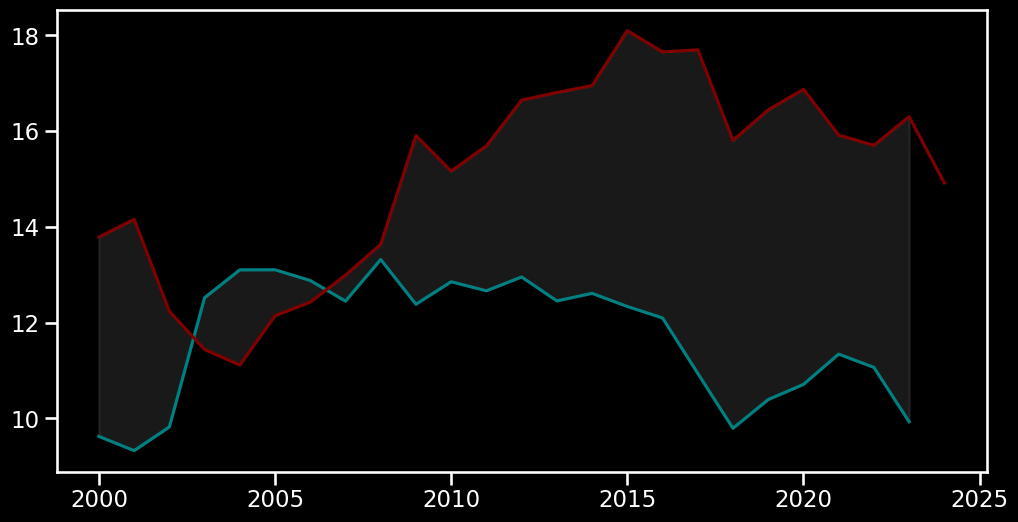

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

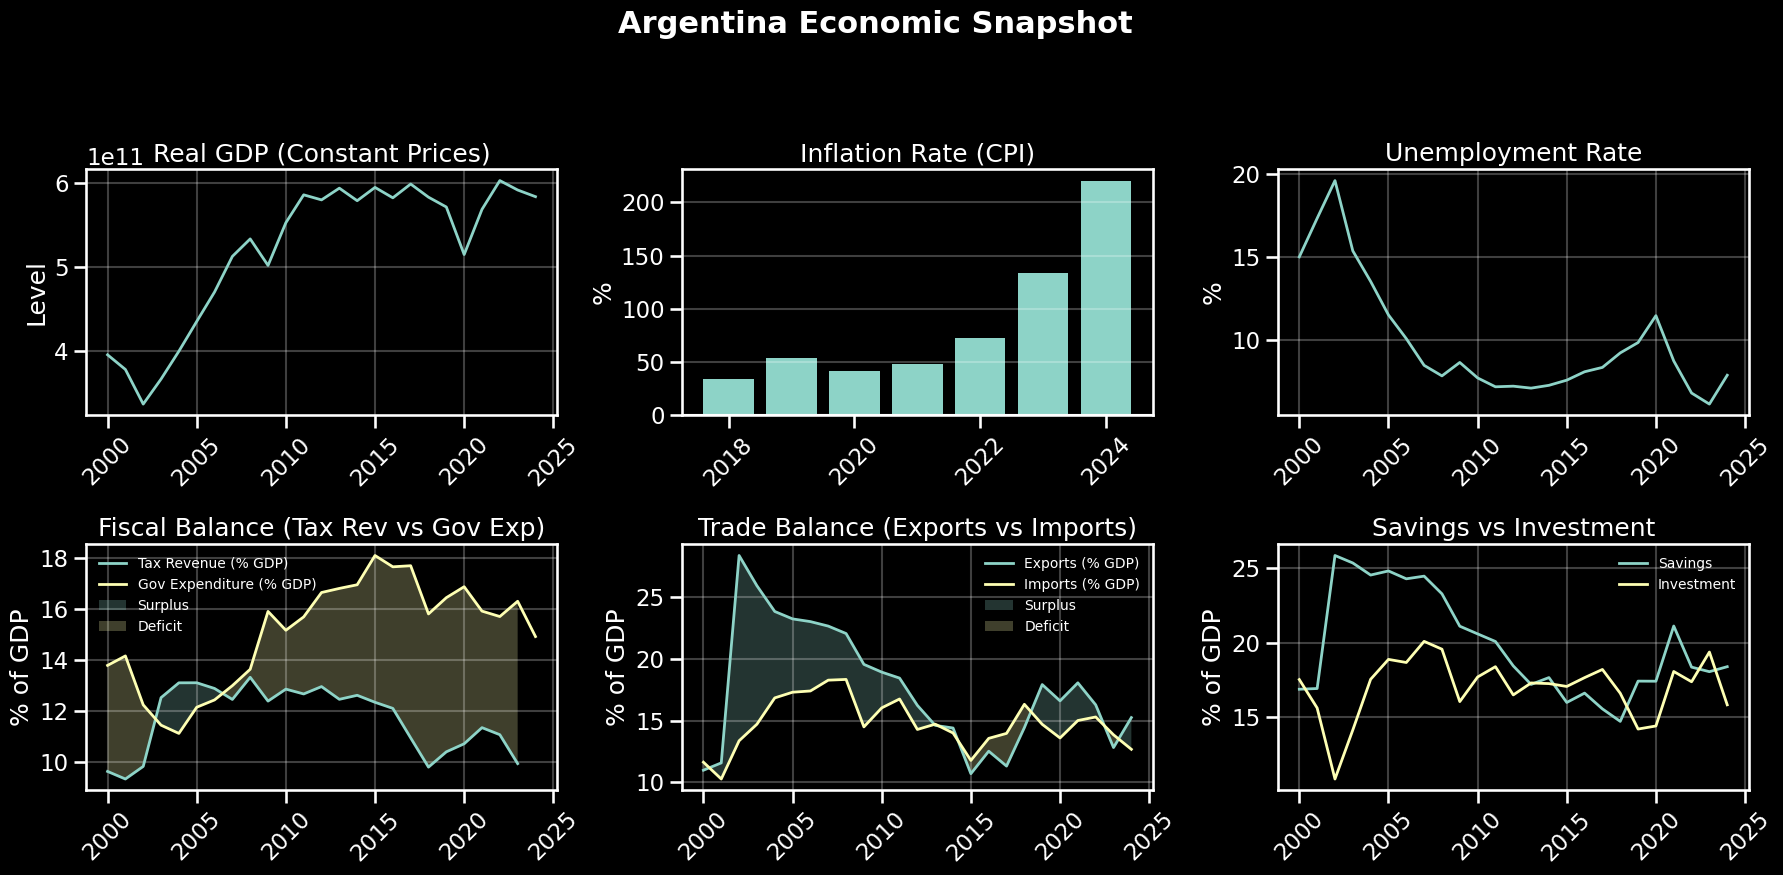

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 0) Prep: pick x-axis column/index
# -----------------------------
# If your DataFrame already has a time index (e.g., years), this will use it.
# Otherwise, set TIME_COL to the name of your time column (e.g., "Year", "Date").
TIME_COL = None  # <-- set to "Year" if you have a Year column

df = df_gtm.copy()

if TIME_COL is not None:
    df = df.sort_values(TIME_COL)
    x = df[TIME_COL].values
else:
    # use index as time axis
    df = df.sort_index()
    x = df.index.values

# Coerce all needed columns to numeric (handles strings, commas, etc.)
cols = [
    "GDP_Const", "Inflation_CPI", "Unemployment_Rate",
    "Tax_Rev_GDP", "Gov_Exp_GDP",
    "Exports_GDP", "Imports_GDP",
    "Gross_Dom_Savings", "Gross_Cap_Formation"
]
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Optional: drop rows where everything is missing (keeps gaps if only some series missing)
df = df.dropna(how="all", subset=cols)
if TIME_COL is not None:
    x = df[TIME_COL].values
else:
    x = df.index.values

# -----------------------------
# 1) Style + figure
# -----------------------------
plt.style.use("dark_background")
sns.set_context("talk")  # bigger, presentation-friendly

fig, axes = plt.subplots(2, 3, figsize=(18, 9), constrained_layout=False)
fig.suptitle("Argentina Economic Snapshot", fontsize=22, fontweight="bold", y=0.98)

# -----------------------------
# 2) Top Left: Real GDP (line)
# -----------------------------
ax = axes[0, 0]
ax.plot(x, df["GDP_Const"], linewidth=2)
ax.set_title("Real GDP (Constant Prices)")
ax.set_xlabel("")
ax.set_ylabel("Level")
ax.grid(alpha=0.25)

# -----------------------------
# 3) Top Middle: Inflation (bar) + 0-line
# -----------------------------
ax = axes[0, 1]
ax.bar(x, df["Inflation_CPI"])
ax.axhline(0, linewidth=1.5)
ax.set_title("Inflation Rate (CPI)")
ax.set_xlabel("")
ax.set_ylabel("%")
ax.grid(axis="y", alpha=0.25)

# -----------------------------
# 4) Top Right: Unemployment (line)
# -----------------------------
ax = axes[0, 2]
ax.plot(x, df["Unemployment_Rate"], linewidth=2)
ax.set_title("Unemployment Rate")
ax.set_xlabel("")
ax.set_ylabel("%")
ax.grid(alpha=0.25)

# -----------------------------
# 5) Bottom Left: Fiscal Balance (fill between tax rev & gov exp)
# -----------------------------
ax = axes[1, 0]
tax = df["Tax_Rev_GDP"]
exp = df["Gov_Exp_GDP"]
ax.plot(x, tax, linewidth=2, label="Tax Revenue (% GDP)")
ax.plot(x, exp, linewidth=2, label="Gov Expenditure (% GDP)")
ax.fill_between(x, tax, exp, where=(tax >= exp), interpolate=True, alpha=0.25, label="Surplus")
ax.fill_between(x, tax, exp, where=(tax <  exp), interpolate=True, alpha=0.25, label="Deficit")
ax.set_title("Fiscal Balance (Tax Rev vs Gov Exp)")
ax.set_xlabel("")
ax.set_ylabel("% of GDP")
ax.grid(alpha=0.25)
ax.legend(frameon=False, fontsize=10, loc="best")

# -----------------------------
# 6) Bottom Middle: Trade Balance (fill between exports & imports)
# -----------------------------
ax = axes[1, 1]
ex = df["Exports_GDP"]
im = df["Imports_GDP"]
ax.plot(x, ex, linewidth=2, label="Exports (% GDP)")
ax.plot(x, im, linewidth=2, label="Imports (% GDP)")
ax.fill_between(x, ex, im, where=(ex >= im), interpolate=True, alpha=0.25, label="Surplus")
ax.fill_between(x, ex, im, where=(ex <  im), interpolate=True, alpha=0.25, label="Deficit")
ax.set_title("Trade Balance (Exports vs Imports)")
ax.set_xlabel("")
ax.set_ylabel("% of GDP")
ax.grid(alpha=0.25)
ax.legend(frameon=False, fontsize=10, loc="best")

# -----------------------------
# 7) Bottom Right: Savings vs Investment (dual lines)
# -----------------------------
ax = axes[1, 2]
sav = df["Gross_Dom_Savings"]
inv = df["Gross_Cap_Formation"]
ax.plot(x, sav, linewidth=2, label="Savings")
ax.plot(x, inv, linewidth=2, label="Investment")
ax.set_title("Savings vs Investment")
ax.set_xlabel("")
ax.set_ylabel("% of GDP")
ax.grid(alpha=0.25)
ax.legend(frameon=False, fontsize=10, loc="best")

# -----------------------------
# 8) Final layout tweaks
# -----------------------------
# If your x-axis is dense (e.g., monthly), rotate tick labels for readability.
for ax in axes.ravel():
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave room for suptitle
plt.show()
